In [1]:
# Import Neccessary Lib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load Dataset.
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Dataset2/main/temperature.csv')
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


# Exploratory Data Analysis

In [3]:
# Dataset size.
df.shape

(7752, 25)

##### This dataset contains 7752 rows and 25 columns, out of which two column represents the target variable and the remaining columns are independent variables.

In [4]:
# Showing columns.
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [5]:
# Showing sum of null for all the columns.
df.isna().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [6]:
# Fill missing values based on column type
for column in df.columns:
    if df[column].dtype == 'object':  # Date columns
        # Fill with the mode (most frequent value)
        mode_value = df[column].mode()[0]
        df[column].fillna(mode_value, inplace=True)
    else:  # Numerical columns
        # Fill with the median (could use mean as well)
        median_value = df[column].median()
        df[column].fillna(median_value, inplace=True)

In [7]:
# Again checking.
df.isna().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [8]:
# Showing column's type.
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

In [9]:
# Dropping Date column.
df.drop('Date', axis= 1, inplace=True)

In [10]:
# Again showing column's type.
df.dtypes

station             float64
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

In [11]:
# Checking duplicate values.
df.duplicated().sum()

0

In [12]:
# Showing information with non-null values and the number of columns by data type.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7752 non-null   float64
 1   Present_Tmax      7752 non-null   float64
 2   Present_Tmin      7752 non-null   float64
 3   LDAPS_RHmin       7752 non-null   float64
 4   LDAPS_RHmax       7752 non-null   float64
 5   LDAPS_Tmax_lapse  7752 non-null   float64
 6   LDAPS_Tmin_lapse  7752 non-null   float64
 7   LDAPS_WS          7752 non-null   float64
 8   LDAPS_LH          7752 non-null   float64
 9   LDAPS_CC1         7752 non-null   float64
 10  LDAPS_CC2         7752 non-null   float64
 11  LDAPS_CC3         7752 non-null   float64
 12  LDAPS_CC4         7752 non-null   float64
 13  LDAPS_PPT1        7752 non-null   float64
 14  LDAPS_PPT2        7752 non-null   float64
 15  LDAPS_PPT3        7752 non-null   float64
 16  LDAPS_PPT4        7752 non-null   float64


<Axes: >

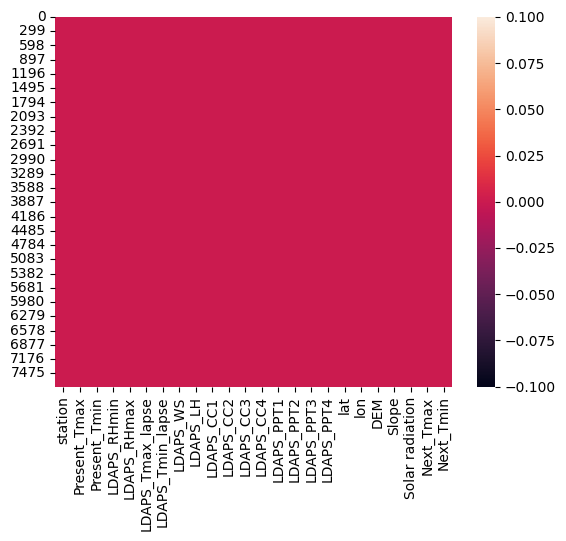

In [13]:
# Showing null values with heatmap.
sns.heatmap(df.isnull())

In [14]:
# Analyzing the dataset with 10 rows.
df.head(10)

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5
5,6.0,31.9,23.5,52.437126,85.307251,29.219342,23.822613,6.182295,50.231389,0.185279,...,0.0,0.0,0.0,37.5102,127.042,54.6384,0.1457,5873.780762,31.5,24.0
6,7.0,31.4,24.4,56.287189,81.019760,28.551859,24.238467,5.587135,125.110007,0.389600,...,0.0,0.0,0.0,37.5776,126.838,12.3700,0.0985,5849.233398,30.9,23.4
7,8.0,32.1,23.6,52.326218,78.004539,28.851982,23.819054,6.104417,42.011547,0.357856,...,0.0,0.0,0.0,37.4697,126.910,52.5180,1.5629,5863.992188,31.1,22.9
8,9.0,31.4,22.0,55.338791,80.784607,28.426975,23.332373,6.017135,85.110971,0.408766,...,0.0,0.0,0.0,37.4967,126.826,50.9312,0.4125,5876.901367,31.3,21.6
9,10.0,31.6,20.5,56.651203,86.849632,27.576705,22.527018,6.518841,63.006075,0.348292,...,0.0,0.0,0.0,37.4562,126.955,208.5070,5.1782,5893.608398,30.5,21.0


In [15]:
# Checking unique value.
df['LDAPS_PPT2'].unique()

array([ 0.        ,  9.93311109, 11.83342134, ...,  0.29865928,
        0.30087843,  0.24799708])

In [16]:
# checking value count.
df['LDAPS_PPT2'].value_counts()

LDAPS_PPT2
0.000000     5226
0.001953        7
0.000040        3
0.000781        3
21.621661       2
             ... 
0.012846        1
0.020298        1
0.003971        1
0.009729        1
0.247997        1
Name: count, Length: 2510, dtype: int64

In [17]:
# checking zero's
zero_df = ['LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'LDAPS_PPT1']
for col in zero_df:
    print(df[col].value_counts())

LDAPS_PPT2
0.000000     5226
0.001953        7
0.000040        3
0.000781        3
21.621661       2
             ... 
0.012846        1
0.020298        1
0.003971        1
0.009729        1
0.247997        1
Name: count, Length: 2510, dtype: int64
LDAPS_PPT3
0.000000    5369
0.001953      10
0.000852       4
0.002604       3
0.000038       2
            ... 
0.009490       1
0.005241       1
0.114325       1
0.007045       1
0.021030       1
Name: count, Length: 2356, dtype: int64
LDAPS_PPT4
0.000000     5826
0.001953        3
16.655469       2
0.001065        2
0.001105        2
             ... 
5.862256        1
4.265625        1
0.009690        1
0.005128        1
3.093815        1
Name: count, Length: 1918, dtype: int64
LDAPS_PPT1
0.000000    4919
0.001953      11
0.002604       5
0.001734       3
0.000048       2
            ... 
0.298803       1
0.330680       1
0.330527       1
0.302974       1
2.040502       1
Name: count, Length: 2812, dtype: int64


#### We have noticed that there are more than 5,000 zeros in these columns, which suggests that it is not important and will not significantly affect the result.

### Dropping columns that have many zeros.

In [18]:
# drooping columns
df.drop(zero_df, axis=1, inplace = True)

In [19]:
# Displaying the updated dataset.
df

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,0.081035,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,0.074962,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,0.048954,0.059869,0.000000,0.000796,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,13.0,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


# Distribution Analysis

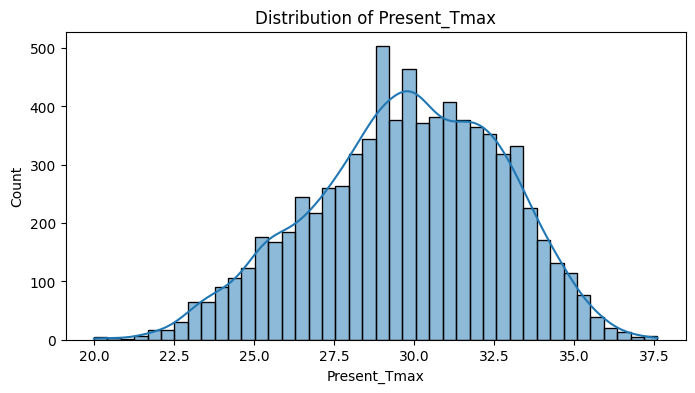

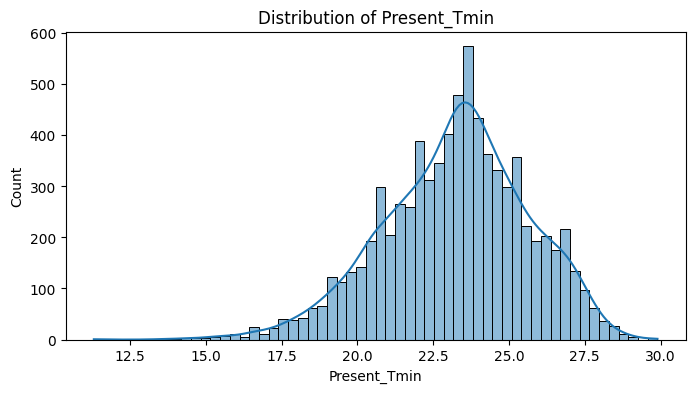

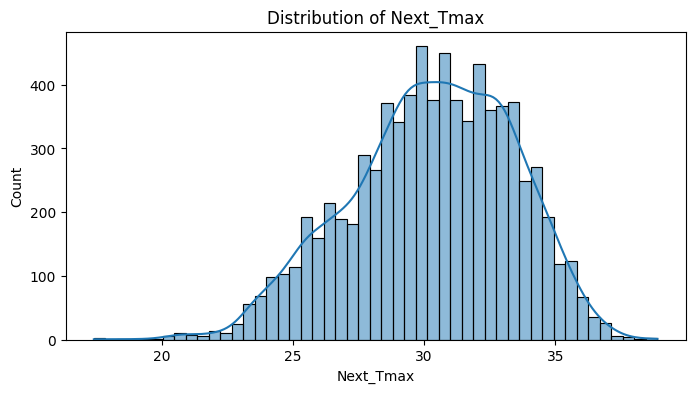

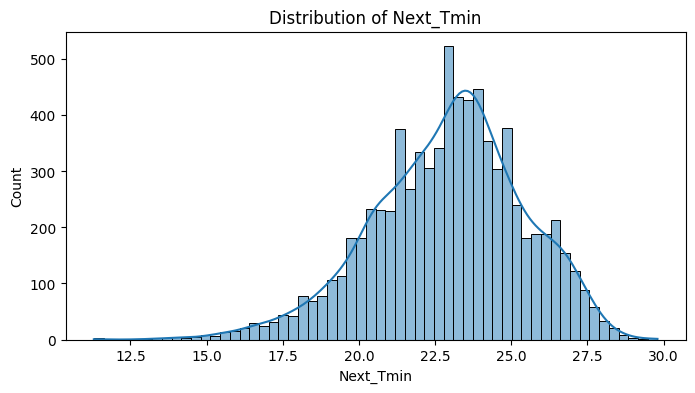

In [20]:
# Plot distribution for a few important features
imp_feature = ['Present_Tmax', 'Present_Tmin', 'Next_Tmax', 'Next_Tmin']
for feature in imp_feature:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

# Data Visualization

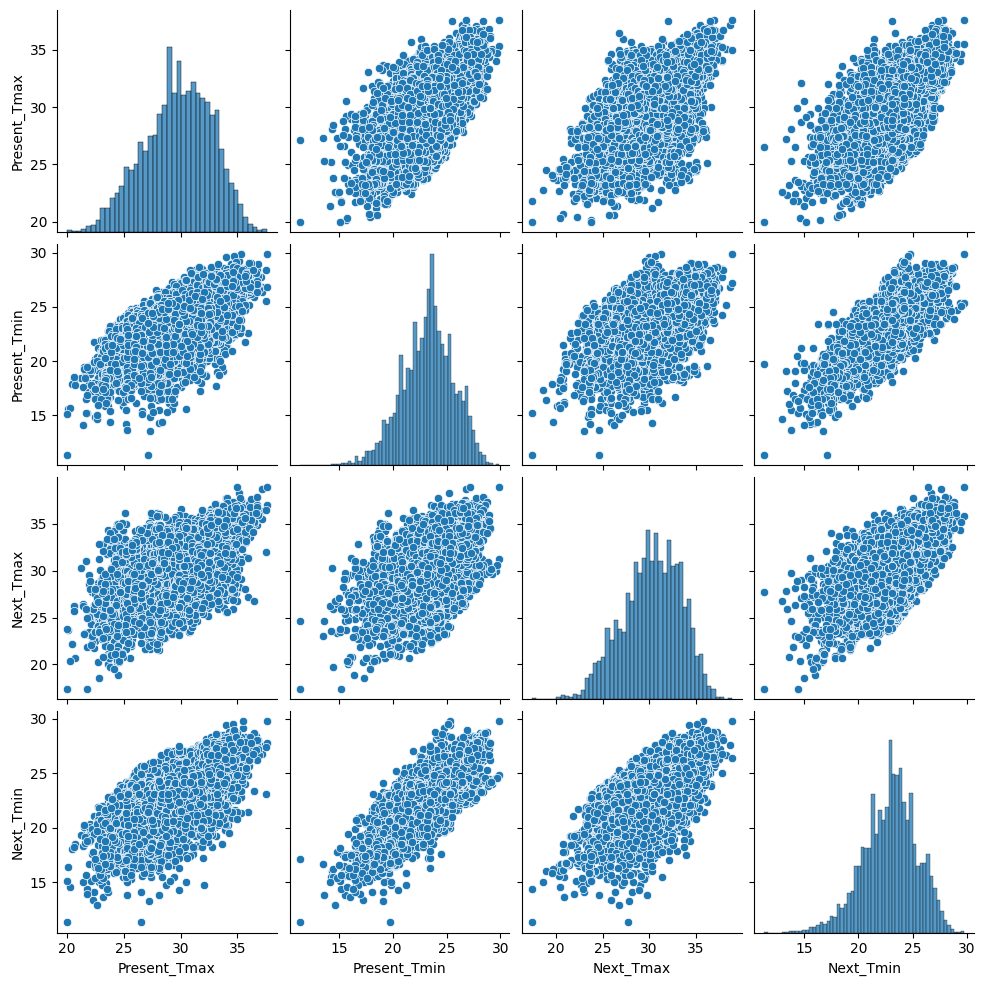

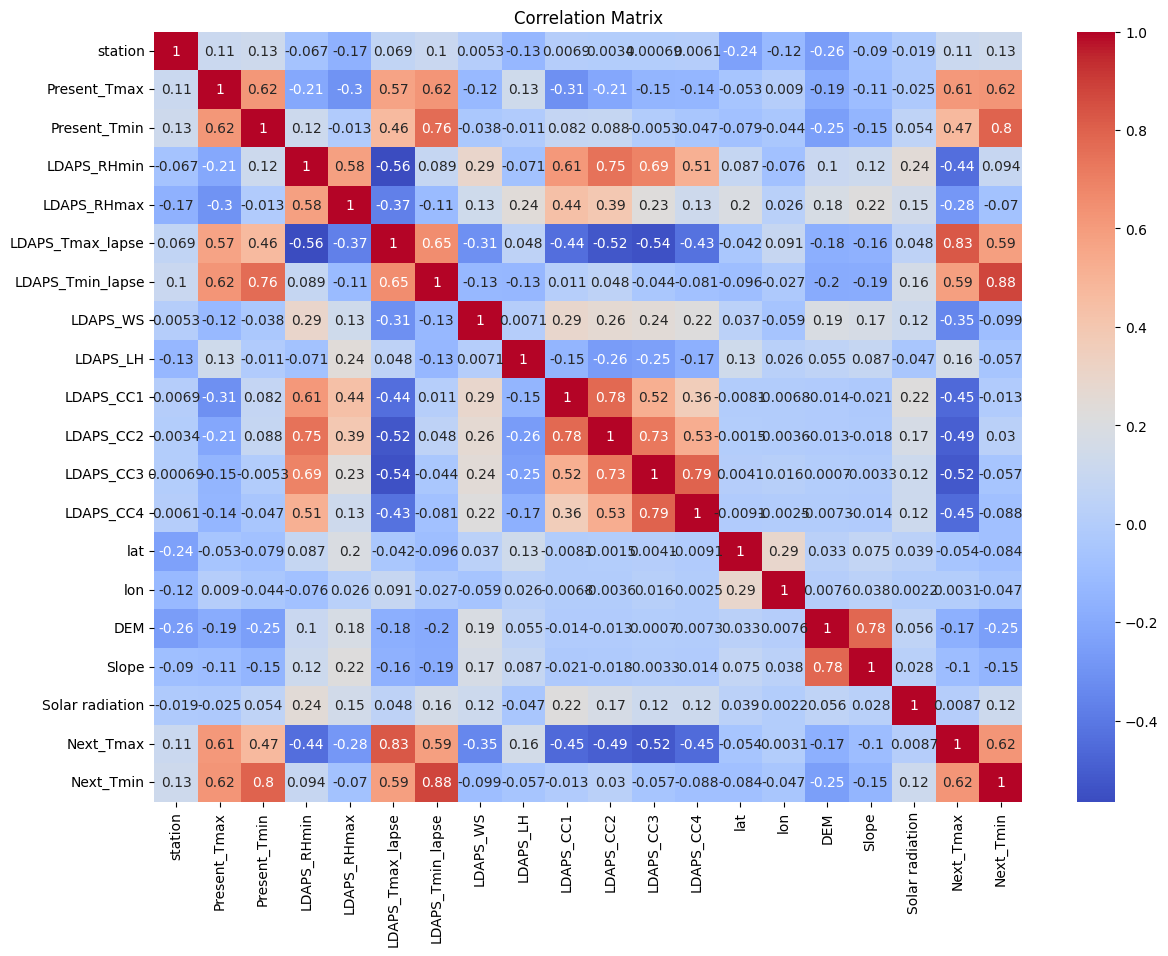

In [21]:
# Scatter plots to visualize relationships
sns.pairplot(df[imp_feature])
plt.show()

# Heatmap to visualize correlations
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [22]:
# Showing a summary of information for all datasets.
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000
mean,13.000000,29.769401,23.226638,56.742728,88.388529,29.614317,23.514984,7.092549,62.450457,0.368260,0.355658,0.317864,0.298499,37.544722,126.991397,61.867972,1.257048,5341.502803,30.275671,22.932804
std,7.210637,2.956583,2.403093,14.597945,7.158471,2.932911,2.334099,2.173913,33.571540,0.261236,0.256845,0.249208,0.253211,0.050352,0.079435,54.279780,1.370444,429.158867,3.122585,2.483296
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,46.046162,84.316923,27.693091,22.114651,5.686487,37.532764,0.148321,0.142328,0.103100,0.082741,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.400000
50%,13.000000,29.900000,23.400000,55.039024,89.793480,29.703426,23.760199,6.547470,56.865482,0.315697,0.312421,0.262555,0.227664,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,32.000000,24.900000,67.038254,93.704500,31.683819,25.134000,8.007471,83.904586,0.571696,0.554963,0.494007,0.497230,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,0.968353,0.983789,0.974710,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


#### According to the dataset, we can observe that there are outliers and skewness present in the data.
#### Additionally, the count shows that only non-null values are present in this dataset.

# Finding Outlier and Treat it.

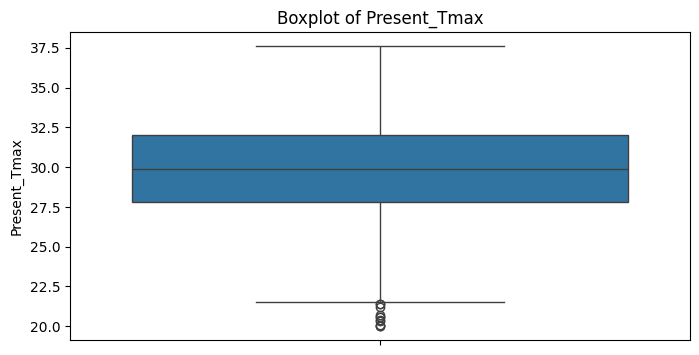

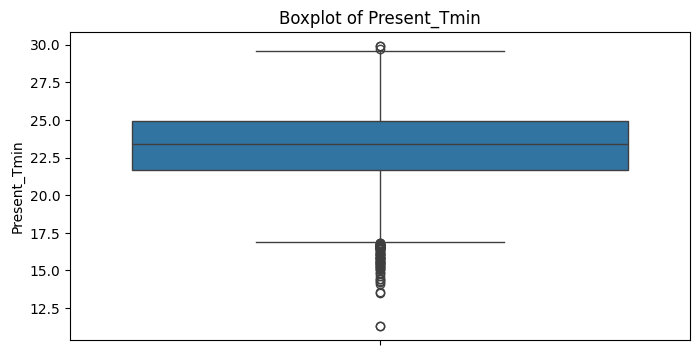

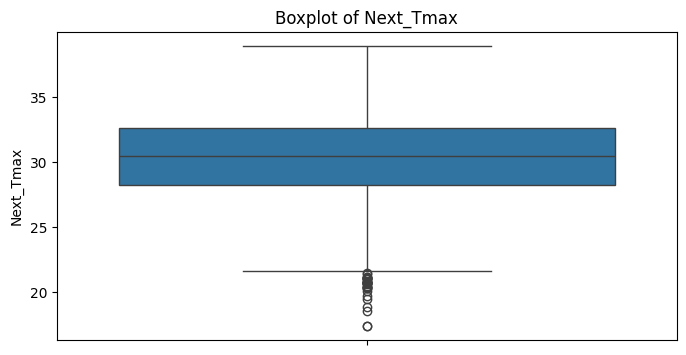

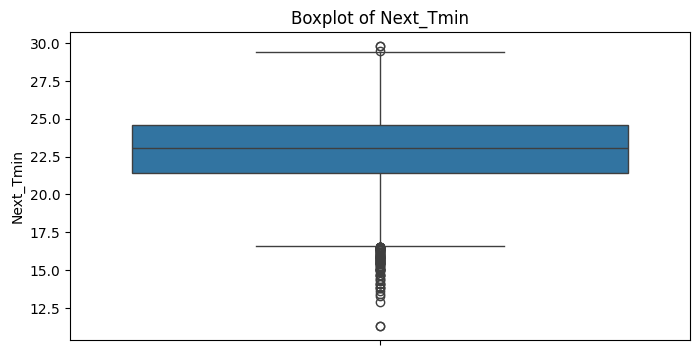

In [23]:
# checking outliers.
for col in imp_feature:
    plt.figure(figsize=(8, 4))
    sns.boxplot(df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [24]:
# Handling outliers - Capping them
for col in imp_feature:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

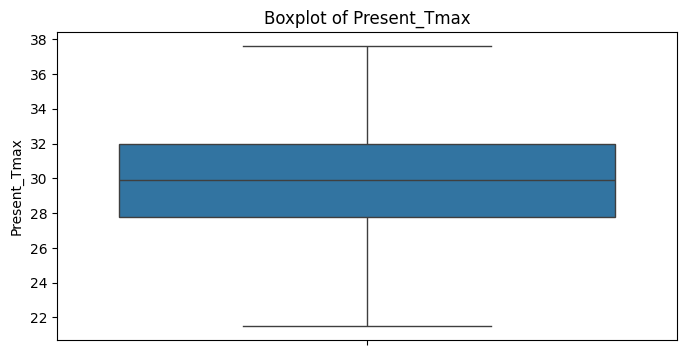

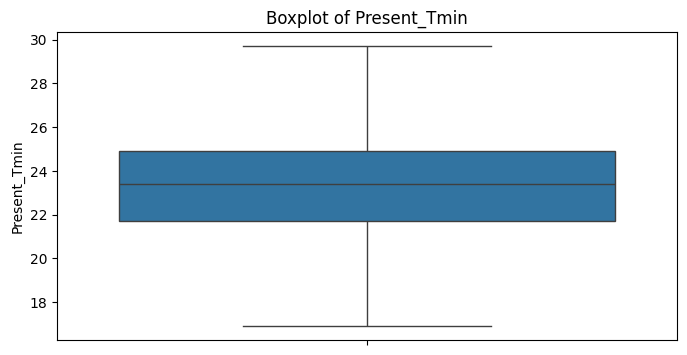

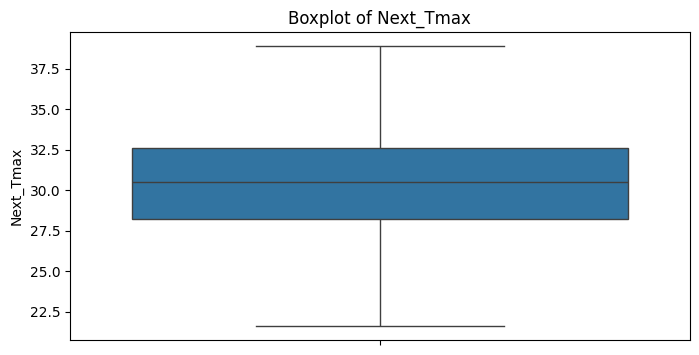

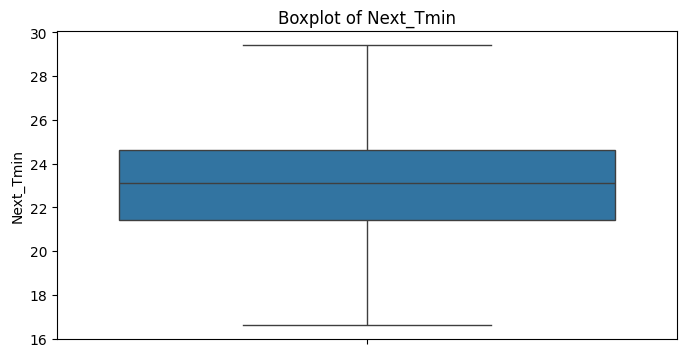

In [25]:
# after removing all the outliers.
for col in imp_feature:
    plt.figure(figsize=(8, 4))
    sns.boxplot(df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

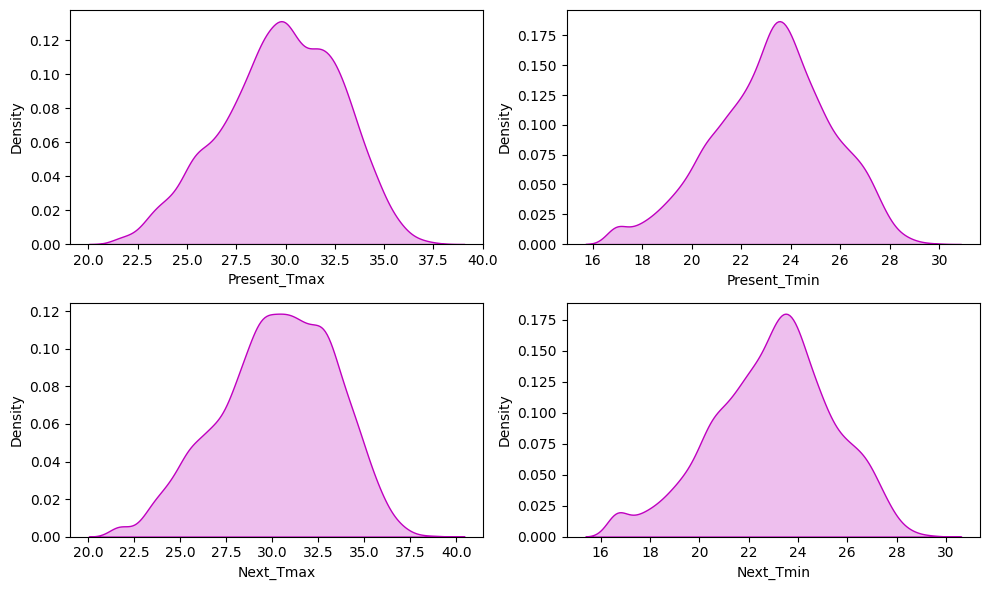

In [26]:
# Showing skewness through distribution plot.
plt.figure(figsize=(10,6), facecolor='White')
plotnumber = 1
for col in imp_feature:
    if plotnumber <=4:
        ax = plt.subplot(2,2,plotnumber)
        sns.distplot(df[col], color='m', kde_kws={'shade' : True}, hist=False)
        plt.xlabel(col, fontsize= 10)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber+=1
plt.tight_layout()

In [27]:
# We can observed that important feature does have skewness but for make it more sure we can check it by using skew() method.
df.skew()

station             0.000000
Present_Tmax       -0.256067
Present_Tmin       -0.262489
LDAPS_RHmin         0.303565
LDAPS_RHmax        -0.860210
LDAPS_Tmax_lapse   -0.228767
LDAPS_Tmin_lapse   -0.584737
LDAPS_WS            1.584975
LDAPS_LH            0.678315
LDAPS_CC1           0.465003
LDAPS_CC2           0.477041
LDAPS_CC3           0.646670
LDAPS_CC4           0.673700
lat                 0.087062
lon                -0.285213
DEM                 1.723257
Slope               1.563020
Solar radiation    -0.511210
Next_Tmax          -0.302405
Next_Tmin          -0.286593
dtype: float64

In [28]:
# Removing possible skewness.
from scipy.stats import boxcox

# creating function to reduce the skewness.
def reduce_skewness(series):
    if series.skew() > 0:
        return np.log1p(series)  # For positive skew
    elif series.skew() < 0:
        return np.square(series)  # For negative skew
    return series

# transformation for all numeric columns
df = df.apply(lambda col: reduce_skewness(col) if col.dtype in [np.float64, np.int64] else col)

# Apply Box-Cox for positive columns
df = df.apply(lambda col: boxcox(col + 1)[0] if (col > 0).all() else col)

# Check updated skewness
print(df.skew())

station            -0.204565
Present_Tmax       -0.036297
Present_Tmin       -0.022082
LDAPS_RHmin        -0.024674
LDAPS_RHmax        -0.116830
LDAPS_Tmax_lapse   -0.009613
LDAPS_Tmin_lapse   -0.018719
LDAPS_WS           -0.003316
LDAPS_LH           -0.625766
LDAPS_CC1           0.217762
LDAPS_CC2           0.219353
LDAPS_CC3           0.391699
LDAPS_CC4           0.449015
lat                 0.000000
lon                      NaN
DEM                 0.010058
Slope               0.124779
Solar radiation    -0.176641
Next_Tmax          -0.041802
Next_Tmin          -0.024042
dtype: float64


# Scaling Feature

In [29]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df.drop(['station', 'lat'], axis=1))

# Converting back to DataFrame
df = pd.DataFrame(scaled_df, columns=df.columns.drop(['station', 'lat']))

In [30]:
# Again checking the null values.
df.isnull().sum()

Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            4
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [31]:
# filling the median value.
median_value = df['LDAPS_LH'].median()
df['LDAPS_LH'].fillna(median_value, inplace=True)

In [32]:
# After filling the null values.
df.isnull().sum()

Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

# Model Building
### Splitting the Data

In [33]:
# Importing the ML modules.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Splitting the data for Next_Tmax
x_max = df.drop('Next_Tmax', axis=1)
y_max = df['Next_Tmax']
x_max_train, x_max_test, y_max_train, y_max_test = train_test_split(x_max, y_max, test_size=0.2, random_state=42)

# Model Selection and Training

In [34]:
# LinearRegression model for Next_Tmax
lr_max = LinearRegression()
lr_max.fit(x_max_train, y_max_train)

LinearRegression()

In [35]:
# Random Forest model for Next_Tmin
rf_min = RandomForestRegressor(n_estimators=100, random_state=42)
rf_min.fit(x_min_train, y_min_train)

RandomForestRegressor(random_state=42)

# Model Evaluation

In [36]:
# Evaluating Linear Regression Model (Next_Tmax)
y_max_pred = lr_max.predict(x_max_test)
print(f'Linear Regression for Next_Tmax: RMSE = {np.sqrt(mean_squared_error(y_max_test, y_max_pred))}, R2 = {r2_score(y_max_test, y_max_pred)}')

Linear Regression for Next_Tmax: RMSE = 0.4679473435686424, R2 = 0.7816808203447969


# Performing hyperparameter tuning

In [37]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

In [38]:
# Ridge Regression
ridge = Ridge()
ridge_params = {'alpha': [0.1, 1.0, 10.0, 100.0]}
ridge_grid = GridSearchCV(ridge, ridge_params, cv=5)
ridge_grid.fit(x_max_train, y_max_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.1, 1.0, 10.0, 100.0]})

In [39]:
# Lasso Regression
lasso = Lasso()
lasso_params = {'alpha': [0.01, 0.1, 1.0, 10.0]}
lasso_grid = GridSearchCV(lasso, lasso_params, cv=5)
lasso_grid.fit(x_max_train, y_max_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.01, 0.1, 1.0, 10.0]})

In [40]:
# Evaluate Ridge and Lasso
ridge = ridge_grid.best_estimator_
lasso = lasso_grid.best_estimator_

y_ridge_pred = ridge.predict(x_max_test)
y_lasso_pred = lasso.predict(x_max_test)

print(f'Ridge Regression RMSE: {np.sqrt(mean_squared_error(y_max_test, y_ridge_pred))}, R2: {r2_score(y_max_test, y_ridge_pred)}')
print(f'Lasso Regression RMSE: {np.sqrt(mean_squared_error(y_max_test, y_lasso_pred))}, R2: {r2_score(y_max_test, y_lasso_pred)}')

Ridge Regression RMSE: 0.468034386302606, R2: 0.7815995938311083
Lasso Regression RMSE: 0.4743434613867254, R2: 0.77567186015858


# Decision Tree Regressor

In [41]:
# A Decision Tree Regressor splits the data based on feature values and can handle non-linear relationships better.
from sklearn.tree import DecisionTreeRegressor

# Decision Tree
DTR = DecisionTreeRegressor(random_state=42)
DTR_params = {'max_depth': [5, 10, 20, None], 'min_samples_split': [2, 10, 20]}
DTR_grid = GridSearchCV(DTR, DTR_params, cv=5)
DTR_grid.fit(x_max_train, y_max_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': [5, 10, 20, None],
                         'min_samples_split': [2, 10, 20]})

In [42]:
# Evaluate Decision Tree
DTR_best = DTR_grid.best_estimator_
y_dt_pred = DTR_best.predict(x_max_test)

print(f'Decision Tree RMSE: {np.sqrt(mean_squared_error(y_max_test, y_dt_pred))}, R2: {r2_score(y_max_test, y_dt_pred)}')

Decision Tree RMSE: 0.44362491629451406, R2: 0.8037860958728043


# Random Forest Regressor

In [43]:
# Random Forests are an ensemble of Decision Trees and tend to perform better by reducing overfitting.

# Random Forest
RFR = RandomForestRegressor(random_state=42)
RFR_params = {'n_estimators': [100, 200], 'max_depth': [10, 20, None]}
RFR_grid = GridSearchCV(RFR, RFR_params, cv=5)
RFR_grid.fit(x_max_train, y_max_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [10, 20, None],
                         'n_estimators': [100, 200]})

In [44]:
# Evaluate Random Forest
RFR_best = RFR_grid.best_estimator_
y_RFR_pred = RFR_best.predict(x_max_test)

print(f'Random Forest RMSE: {np.sqrt(mean_squared_error(y_max_test, y_RFR_pred))}, R2: {r2_score(y_max_test, y_RFR_pred)}')

Random Forest RMSE: 0.3036871864687119, R2: 0.908050186141459


# Final Step: Random Forest is the Best Model
#### After running the models, compare the RMSE and R² values for all of them. The model with the lowest RMSE and highest R² would be your best option.

# Evaluating Random Forest Model (Next_Tmin)

In [54]:
# Splitting the data for Next_Tmin
x_min = df.drop('Next_Tmin', axis=1)
y_min = df['Next_Tmin']
x_min_train, x_min_test, y_min_train, y_min_test = train_test_split(x_min, y_min, test_size=0.2, random_state=42)

In [55]:
# Prediction for Next_Tmin
y_min_pred = rf_min.predict(x_min_test)
print(f'Random Forest for Next_Tmin: RMSE = {np.sqrt(mean_squared_error(y_min_test, y_min_pred))}, R2 = {r2_score(y_min_test, y_min_pred)}')

Random Forest for Next_Tmin: RMSE = 0.3002924494349153, R2 = 0.9101612535674146


# Final Model and Predictions

In [57]:
# Predicting Next_Tmax using the best model (Linear Regression in this case)
final_max_predictions = RFR_grid.predict(x_max_test)

# Predicting Next_Tmin using the best model (Random Forest in this case)
final_min_predictions = rf_min.predict(x_min_test)

# Saving the predictions in CSV file.

In [58]:
# Combine predictions into a DataFrame
predictions = pd.DataFrame({
    'Predicted_Next_Tmax': final_max_predictions,
    'Predicted_Next_Tmin': final_min_predictions
})

# Save predictions to a CSV file
predictions.to_csv('final_predictions.csv', index=False)

print("Predictions saved to 'final_predictions.csv'.")

Predictions saved to 'final_predictions.csv'.


In [67]:
# Confirming prediction for Next_Tmax
a = np.array(y_max_test)
df = pd.DataFrame()
df['Predict'] = final_max_predictions
df['Original'] = a
print('Prediction for Next_Tmax: ')
df

Prediction for Next_Tmax: 


,Predict,Original
0,-0.599557,-0.681295
1,1.507138,1.968380
2,-1.523501,-1.536153
3,1.444826,1.968380
4,0.734192,1.019378
...,...,...
1546,0.792482,0.838733
1547,0.367562,0.179958
1548,-0.683311,-0.711515
1549,-1.351117,-1.562813


In [68]:
# Confirming prediction for Next_Tmin
a = np.array(y_min_test)
df = pd.DataFrame()
df['Predict'] = final_min_predictions
df['Original'] = a
print('Prediction for Next_Tmax: ')
df

Prediction for Next_Tmax: 


,Predict,Original
0,-1.051807,-1.088548
1,1.998220,2.012965
2,-0.676199,-0.748936
3,1.060737,0.926977
4,1.342820,1.294621
...,...,...
1546,-0.252632,-0.554297
1547,0.032111,-0.274655
1548,0.141201,-0.315114
1549,-1.205260,-1.378806
